# Orbitaren ezaugarriak, energia eta momentu angeluarra

Eremu grabitatorioaren eraginpean (orohar, indar **zentral** baten eraginpean) dagoen partikula baten orbita, $E$ energia mekanikoa eta $L$ momentua angeluarrak ezagutzen ditugunean, zehaztuta dago. Baina etxera eramateko mezu garrantzitsu bat dago:


**Energia berdineko baina $L$ desberdineko orbitak, desberdinak dira, puntu beretik pasatzen badira ere.**

![Erabiliko den notazioa](orbitak+latex.png)

Izan dadila, adibide honetan, $m_s$ masako satelite bat, Lurraren inguruan orbitatzen, energia potentziala newtondarra izanik. Lurrarekiko distantzia ($r$) eta abiaduraren moduluak ($|\vec{v}|$) berdinak badira, irudiko orbita gorria eta beltzaren energiak berdinak dira:
$$
E=\frac{1}{2}m_sv^2-\frac{GM_Lm_s}{r}.
$$

Bestetik, indarra newtondarra denez:

$$E=-\frac{G M_Lm_s}{2a}$$

Hau da, orbita bietan $a$ berdina da, baina $a$ horretan, $r_p$ eta $r_a$, perigeo eta apogeo-distantziak, ez dira berdinak. $a$ beretik, $r_p$ eta $r_a$-ren arteko banaketa, $L$ momentu angeluarrak (edo $\theta$ angeluak) kontrolatuko du(te). Hori frogatzeko, energiaren ekuazioa ber-idazten dugu abiaduraren posizio-bektorearekiko osagai paralelo eta perpendikularrak erabiliz:

$$E=\frac{1}{2}m_sv^2-\frac{GM_Lm_s}{r}=\frac{1}{2}m_sv_\parallel^2+\frac{1}{2}m_sv_\perp^2-\frac{GM_Lm_s}{r}$$

Eta momentu angeluarra $L=m_s r v \sin\theta=m_s r v_\perp$ denez, goiko ekuazioa honela ber-idazten dugu:

$$E=\frac{1}{2}m_sv_\parallel^2+\frac{L^2}{2m_sr^2}-\frac{GM_Lm_s}{r}$$

Hau da, $E$ konstantea mantenduz, $L$-ren balio asko egon daitezke, $\vec{v}_\parallel$ moduluaren arabera.

Apozentroa edo perizentroan $\vec{v}_\parallel=0$ eta momentu angeluarra eta energiaren ekuazioak honela sinplifikatzen dira:

$$L=m_sr_pv_p=m_sr_av_a$$

eta

$$E=\frac{L^2}{2m_sr_p^2}-\frac{GM_Lm_s}{r_p}=\frac{L^2}{2m_sr_a^2}-\frac{GM_Lm_s}{r_a}$$

In [1]:
# Konstanteak
G=var("G")
# Lurraren masa eta erradioa
Ml=var("Ml")
Rl=var("Rl")
# satelitearen masa
ms=var("ms")
# indar/energia potentzial newtondarraren zenbakitzailearen konstantea
k=G*Ml*ms

# Gure kasuan, orbita zirkularraren erradioa, lurraren erradioaren funtzioaren moduan adierazten dugu
# R0=3*Rl
# Eta hortik, bere abiadura
v0=sqrt(G*Ml/3/Rl)

# r ornbita zirkularraren kasuan, beti izango da 3Rl, beste kasuetan fasearen arabera
# Hau, beraz, aurrerago zehaztuko dugu
r=3*Rl


In [2]:
theSin=sin(75*pi/180)
# Kasu denetan, E eta L horrela kalkulatzen ditugu
E=1/2*ms*v0**2-k/r
L=r*ms*v0*theSin
print("Sinua:",theSin)
# E eta L ezagututa, orbitako parametro guztiak kalkula daitezke
a=-G*Ml*ms/2/E
print("a:",a)
epsilon=sqrt(1+(2*L**2*E)/(ms*k**2))
c=a*epsilon
print("c:",c)
ra=a+c
adimra=(ra/Rl).full_simplify()
print("ra:",ra,": ra/Rl: ",n(adimra,digits=5))
rp=a-c
adimrp=(rp/Rl).full_simplify()
print("rp:",rp,": rp/Rl: ",n(adimrp,digits=5))
print("Eszentrikotasuna:",epsilon)
p=L**2/ms/k
print("Semilatus rectum:",p)
odata1=[]
for J in range(201):
    thetai=J*pi/100
    rs=p/(1+epsilon*cos(thetai))
    x=rs*cos(thetai)
    y=rs*sin(thetai)
    odata1.append(
        [
        (x/Rl).full_simplify(),
        (y/Rl).full_simplify()
    ])
# Abiadura perigeoa eta apogeoan
vp=L/rp/ms
va=L/ra/ms
# r distantziako puntuko abiadura (modulua)
v3R=sqrt(2/ms*(E+k/r))
print("v3R/va eta v3R/vp (adimentsionala)",
     n((v3R/va).full_simplify(),digits=10),
     n((v3R/vp).full_simplify(),digits=10))
print("V3R",v3R,v0)


Sinua: 1/4*sqrt(6) + 1/4*sqrt(2)
a: 3*Rl
c: 3*sqrt(-1/16*(sqrt(6) + sqrt(2))^2 + 1)*Rl
ra: 3*sqrt(-1/16*(sqrt(6) + sqrt(2))^2 + 1)*Rl + 3*Rl : ra/Rl:  3.7765
rp: -3*sqrt(-1/16*(sqrt(6) + sqrt(2))^2 + 1)*Rl + 3*Rl : rp/Rl:  2.2235
Eszentrikotasuna: sqrt(-1/16*(sqrt(6) + sqrt(2))^2 + 1)
Semilatus rectum: 3/16*Rl*(sqrt(6) + sqrt(2))^2
v3R/va eta v3R/vp (adimentsionala) 1.303225373 0.7673269880
V3R sqrt(1/3)*sqrt(G*Ml/Rl) sqrt(1/3)*sqrt(G*Ml/Rl)


In [3]:
theSin=sqrt(3)/2
# Kasu denetan, E eta L horrela kalkulatzen ditugu
E=1/2*ms*v0**2-k/r
L=r*ms*v0*theSin
print("Sinua:",theSin)
# E eta L ezagututa, orbitako parametro guztiak kalkula daitezke
a=-G*Ml*ms/2/E
print("a:",a)
epsilon=sqrt(1+(2*L**2*E)/(ms*k**2))
c=a*epsilon
print("c:",c)
ra=a+c
adimra=(ra/Rl).full_simplify()
print("ra:",ra,": ra/Rl: ",n(adimra,digits=5))
rp=a-c
adimrp=(rp/Rl).full_simplify()
print("rp:",rp,": rp/Rl: ",n(adimrp,digits=5))
print("Eszentrikotasuna:",epsilon)
p=L**2/ms/k
print("Semilatus rectum:",p)
odata2=[]
for J in range(201):
    thetai=J*pi/100
    rs=p/(1+epsilon*cos(thetai))
    x=rs*cos(thetai)
    y=rs*sin(thetai)
    odata2.append(
        [
        (x/Rl).full_simplify(),
        (y/Rl).full_simplify()
    ])
# Abiadura perigeoa eta apogeoan
vp=L/rp/ms
va=L/ra/ms
# r distantziako puntuko abiadura (modulua)
v3R=sqrt(2/ms*(E+k/r))
print("v3R/va eta v3R/vp (adimentsionala)",
     n((v3R/va).full_simplify(),digits=10),
     n((v3R/vp).full_simplify(),digits=10))
print("V3R",v3R,v0)


Sinua: 1/2*sqrt(3)
a: 3*Rl
c: 3/2*Rl
ra: 9/2*Rl : ra/Rl:  4.5000
rp: 3/2*Rl : rp/Rl:  1.5000
Eszentrikotasuna: 1/2
Semilatus rectum: 9/4*Rl
v3R/va eta v3R/vp (adimentsionala) 1.732050808 0.5773502692
V3R sqrt(1/3)*sqrt(G*Ml/Rl) sqrt(1/3)*sqrt(G*Ml/Rl)


In [4]:
theSin=1
# Kasu denetan, E eta L horrela kalkulatzen ditugu
E=1/2*ms*v0**2-k/r
L=r*ms*v0*theSin
print("Sinua:",theSin)
# E eta L ezagututa, orbitako parametro guztiak kalkula daitezke
a=-G*Ml*ms/2/E
print("a:",a)
epsilon=sqrt(1+(2*L**2*E)/(ms*k**2))
c=a*epsilon
print("c:",c)
ra=a+c
adimra=(ra/Rl).full_simplify()
print("ra:",ra,": ra/Rl: ",n(adimra,digits=5))
rp=a-c
adimrp=(rp/Rl).full_simplify()
print("rp:",rp,": rp/Rl: ",n(adimrp,digits=5))
print("Eszentrikotasuna:",epsilon)
p=L**2/ms/k
print("Semilatus rectum:",p)
odata3=[]
for J in range(201):
    thetai=J*pi/100
    rs=p/(1+epsilon*cos(thetai))
    x=rs*cos(thetai)
    y=rs*sin(thetai)
    odata3.append(
        [
        (x/Rl).full_simplify(),
        (y/Rl).full_simplify()
    ])
# Abiadura perigeoa eta apogeoan (kasu honetan ez da behar, puntu guztietan berdina da)
vp=L/rp/ms
va=L/ra/ms
# r distantziako puntuko abiadura (modulua)
v3R=sqrt(2/ms*(E+k/r))
print("v3R/va eta v3R/vp (adimentsionala)",
     n((v3R/va).full_simplify(),digits=10),
     n((v3R/vp).full_simplify(),digits=10))
print("V3R",v3R,v0)


Sinua: 1
a: 3*Rl
c: 0
ra: 3*Rl : ra/Rl:  3.0000
rp: 3*Rl : rp/Rl:  3.0000
Eszentrikotasuna: 0
Semilatus rectum: 3*Rl
v3R/va eta v3R/vp (adimentsionala) 1.000000000 1.000000000
V3R sqrt(1/3)*sqrt(G*Ml/Rl) sqrt(1/3)*sqrt(G*Ml/Rl)


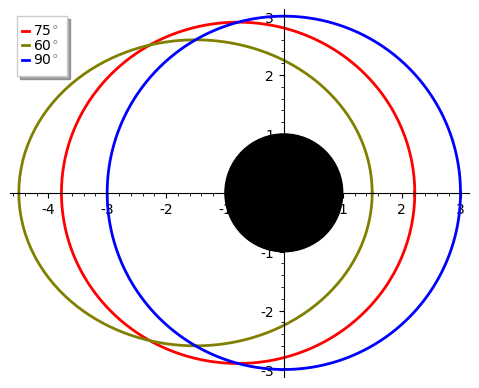

In [5]:
p1=line(odata1,aspect_ratio=1,color="red",legend_label="75$^\\circ$",thickness=2)
p2=line(odata2,aspect_ratio=1,color="olive",legend_label="60$^\\circ$",thickness=2)
p3=line(odata3,aspect_ratio=1,color="blue",legend_label="90$^\\circ$",thickness=2)
p4=circle((0,0),1,aspect_ratio=1,color="black",fill=True)
multiplot=p1+p2+p3+p4
multiplot.legend(True)
multiplot

In [7]:
multiplot.save("orbitak-E-eta-L-plot.pdf")